U= 25312
s= [4.32752254e+04 2.49480067e+03 2.74830033e+02 1.66970179e+02
 7.49724471e+01 4.95073701e+01 2.00151294e+01 1.62479340e+01]
[[ 1.00031616  0.09763604 -0.46206993  0.57889131  0.72055415 -0.58191082
  -0.30147525  0.05573629]
 [ 0.09763604  1.00031616  0.42887523 -0.17256229 -0.15880072  0.16171245
   0.07904048  0.49946308]
 [-0.46206993  0.42887523  1.00031616 -0.66983422 -0.63438565  0.75415429
   0.3236546   0.5228021 ]
 [ 0.57889131 -0.17256229 -0.66983422  1.00031616  0.69837565 -0.5421026
  -0.33597727  0.03226292]
 [ 0.72055415 -0.15880072 -0.63438565  0.69837565  1.00031616 -0.63722828
  -0.34819077 -0.07089423]
 [-0.58191082  0.16171245  0.75415429 -0.5421026  -0.63722828  1.00031616
   0.31380495  0.21474325]
 [-0.30147525  0.07904048  0.3236546  -0.33597727 -0.34819077  0.31380495
   1.00031616  0.07494074]
 [ 0.05573629  0.49946308  0.5228021   0.03226292 -0.07089423  0.21474325
   0.07494074  1.00031616]]
Eigenvector: 
 [[-0.37570052 -0.35027226  0.14504854  0.1

C:\Users\vision\AppData\Local\Temp\ipykernel_248\791913307.py:99: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\vision\AppData\Local\Temp\ipykernel_248\791913307.py:99: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\vision\AppData\Local\Temp\ipykernel_248\791913307.py:99: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():




 Unrotated FA :

[[ 6.90049336e-01  3.73208215e-01  5.86909985e-02 -2.31511639e-03
   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [-2.80339466e-01  5.76080447e-01  1.27702735e-01  8.75778950e-03
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.34593221e-01  2.82960784e-01 -1.50423441e-02  3.00743216e-03
   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 7.59831510e-01  1.65491284e-01 -1.21902585e-01 -1.04131272e-02
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 8.10208711e-01  1.90148135e-01 -2.71649411e-02 -6.67974374e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00]
 [-7.84012775e-01  1.10104714e-02 -1.07711420e-01 -2.65479088e-04
   0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]
 [-4.12325260e-01 -6.04808576e-02  5.50986297e-02 -7.55952169e-02
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.63795583e-01  6.58513152e-01 -7.93362076e-02 

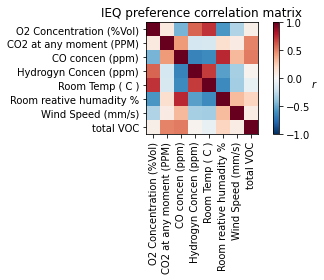

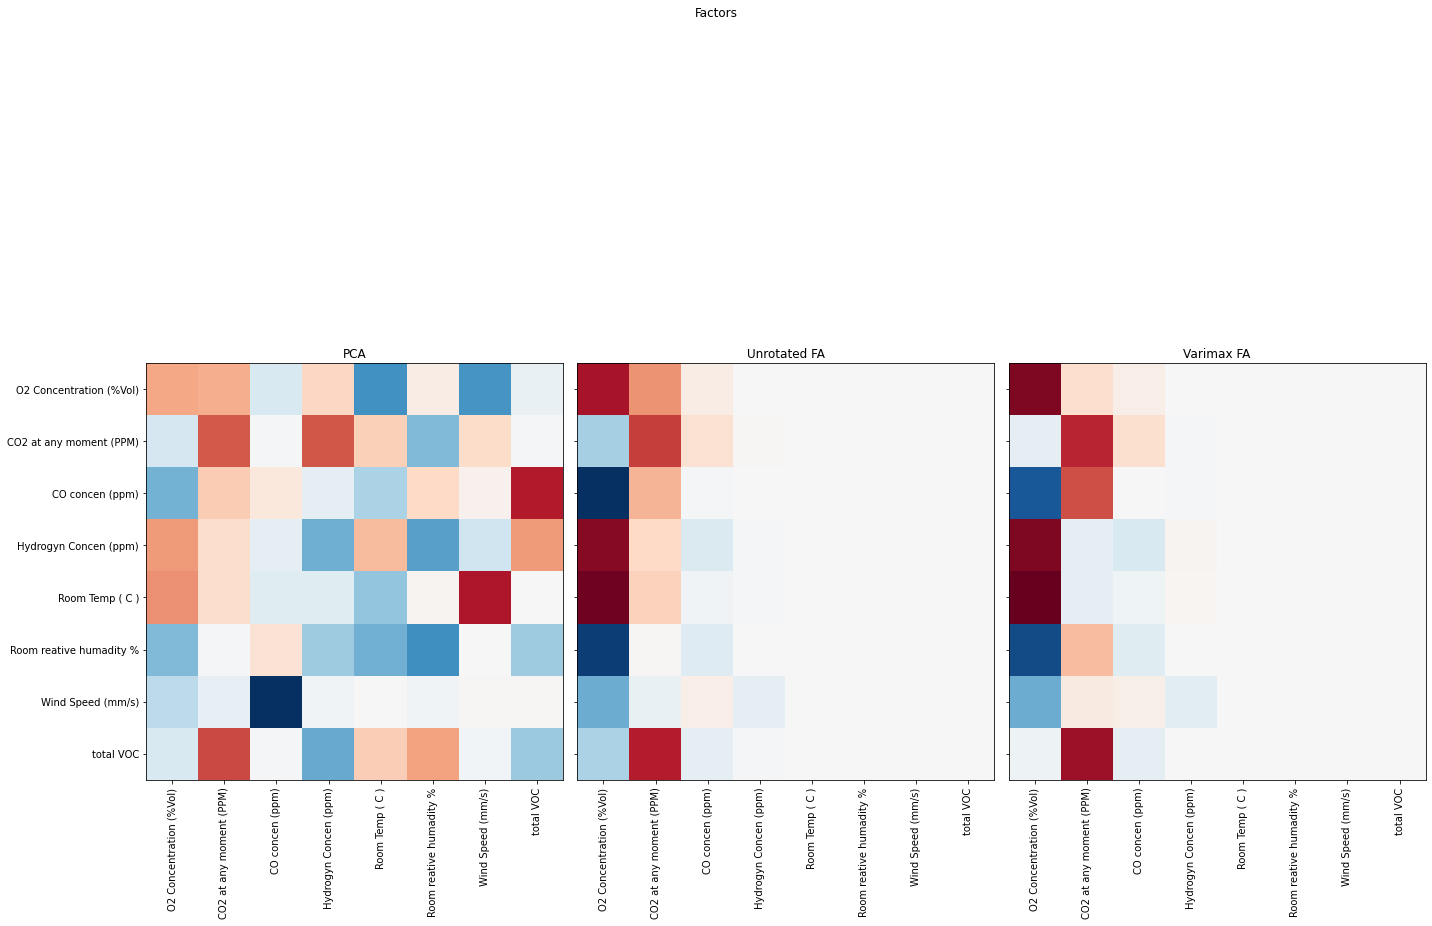

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as alg

from sklearn.decomposition import FactorAnalysis, PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = pd.read_excel (r'C:\Users\vision\Dropbox\ROS\Arch_Plans_Paper\DataSheetsCleaned\all_Measured_Data.xlsx',sheet_name='all_Measured_Data')
df = pd.DataFrame(data, columns= ['O2 Concentration (%Vol)',
                                  'CO2 at any moment (PPM)',
                                  'CO concen (ppm)',
                                  'Hydrogyn Concen (ppm)',
                                  'Room Temp ( C )',
                                  'Room reative humadity %',
                                  'Wind Speed (mm/s)',
                                  'total VOC'])
#df.dtypes
df['CO2 at any moment (PPM)'] = pd.to_numeric(df['CO2 at any moment (PPM)'], errors='coerce') 
#df.dtypes
#df = df.dropna(inplace=True)
#df.dtypes
feature_names = df.iloc[0].T
#print (df)
#df.head()

u, s, vh = alg.svd(df, full_matrices=False, compute_uv=True, hermitian=False)

TruncatedSVD(n_components=8, n_iter=11, random_state=42)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
#new_covariance_matrix = covariance_matrix[~np.isnan(covariance_matrix)]

print(covariance_matrix)

pca = PCA(n_components=1)

pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca
             #, columns = ['pca1', 'pca2'])
    
print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ['O2 Concentration (%Vol)',
                'CO2 at any moment (PPM)',
                'CO concen (ppm)',
                'Hydrogyn Concen (ppm)',
                'Room Temp ( C )',
                'Room reative humadity %',
                'Wind Speed (mm/s)',
                'total VOC']
print(len(featurenames))

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 8

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(x)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    print(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(featurenames)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
    ax.set_xticklabels(featurenames,rotation=90)
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

